<a href="https://colab.research.google.com/github/Duder5000/Computer-Vision-Project/blob/main/Copy_of_YOLOv8_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/proj/YOLODataset"
!ls

/content/drive/MyDrive/proj/YOLODataset
train  val


In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/201.2 GB disk)


## Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [9]:
from ultralytics import YOLO

model = YOLO('yolov8x-cls.pt')  #load a pretrained YOLOv8n classification model
model.train(data='/content/drive/MyDrive/proj/YOLODataset', epochs=3)  #train the model


Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/content/drive/MyDrive/proj/YOLODataset, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

train: Scanning /content/drive/MyDrive/proj/YOLODataset/train... 2089 images, 0 corrupt: 100%|██████████| 2089/2089 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/proj/YOLODataset/val... 883 images, 0 corrupt: 100%|██████████| 883/883 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:06<00:00,  4.56it/s]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:06<00:00,  4.04it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:07<00:00,  3.70it/s]

                   all      0.967          1



3 epochs completed in 0.048 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 112.5MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56127043 parameters, 0 gradients, 153.8 GFLOPs
train: /content/drive/MyDrive/proj/YOLODataset/train... found 2089 images in 3 classes ✅ 
val: /content/drive/MyDrive/proj/YOLODataset/val... found 883 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 28/28 [00:07<00:00,  3.73it/s]


                   all      0.967          1
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba5e1a24f40>
curves: []
curves_results: []
fitness: 0.9835786819458008
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9671573638916016, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9835786819458008}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.07192491810022097, 'inference': 1.8264777528065113, 'loss': 0.017401856177255495, 'postprocess': 0.0031588436658088106}
task: 'classify'
top1: 0.9671573638916016
top5: 1.0

In [10]:
model= YOLO("/content/drive/MyDrive/proj/YOLODataset/runs/classify/train2/weights/best.pt")
metrics = model.val()  #no arguments needed, dataset and settings remembered
metrics.top1   #top1 accuracy

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56127043 parameters, 0 gradients, 153.8 GFLOPs
train: /content/drive/MyDrive/proj/YOLODataset/train... found 2089 images in 3 classes ✅ 
val: /content/drive/MyDrive/proj/YOLODataset/val... found 883 images in 3 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/proj/YOLODataset/val... 883 images, 0 corrupt: 100%|██████████| 883/883 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 56/56 [00:10<00:00,  5.51it/s]


                   all      0.967          1
Speed: 0.1ms preprocess, 4.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


0.9671573638916016

In [11]:
results=model('/content/drive/MyDrive/proj/testImg/paper6.jpg', save=True)
results2=model('/content/drive/MyDrive/proj/testImg/O_13662.jpg', save=True)
results3=model('/content/drive/MyDrive/proj/testImg/R_2362.jpg', save=True)
results4=model('/content/drive/MyDrive/proj/testImg/R_2916.jpg', save=True)
#results
for r in results:
    print(r.probs)  #print the Probs object containing the detected class probabilities

for r in results2:
    print(r.probs)

for r in results3:
    print(r.probs)

for r in results4:
    print(r.probs)



image 1/1 /content/drive/MyDrive/proj/testImg/paper6.jpg: 224x224 paper 0.99, cardboard 0.00, organics 0.00, 14.1ms
Speed: 7.3ms preprocess, 14.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2

image 1/1 /content/drive/MyDrive/proj/testImg/O_13662.jpg: 224x224 organics 0.98, paper 0.02, cardboard 0.00, 14.3ms
Speed: 4.4ms preprocess, 14.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2

image 1/1 /content/drive/MyDrive/proj/testImg/R_2362.jpg: 224x224 cardboard 1.00, paper 0.00, organics 0.00, 14.6ms
Speed: 5.2ms preprocess, 14.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict2

image 1/1 /content/drive/MyDrive/proj/testImg/R_2916.jpg: 224x224 cardboard 0.91, paper 0.09, organics 0.00, 14.3ms
Speed: 4.1ms preprocess, 14.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/c

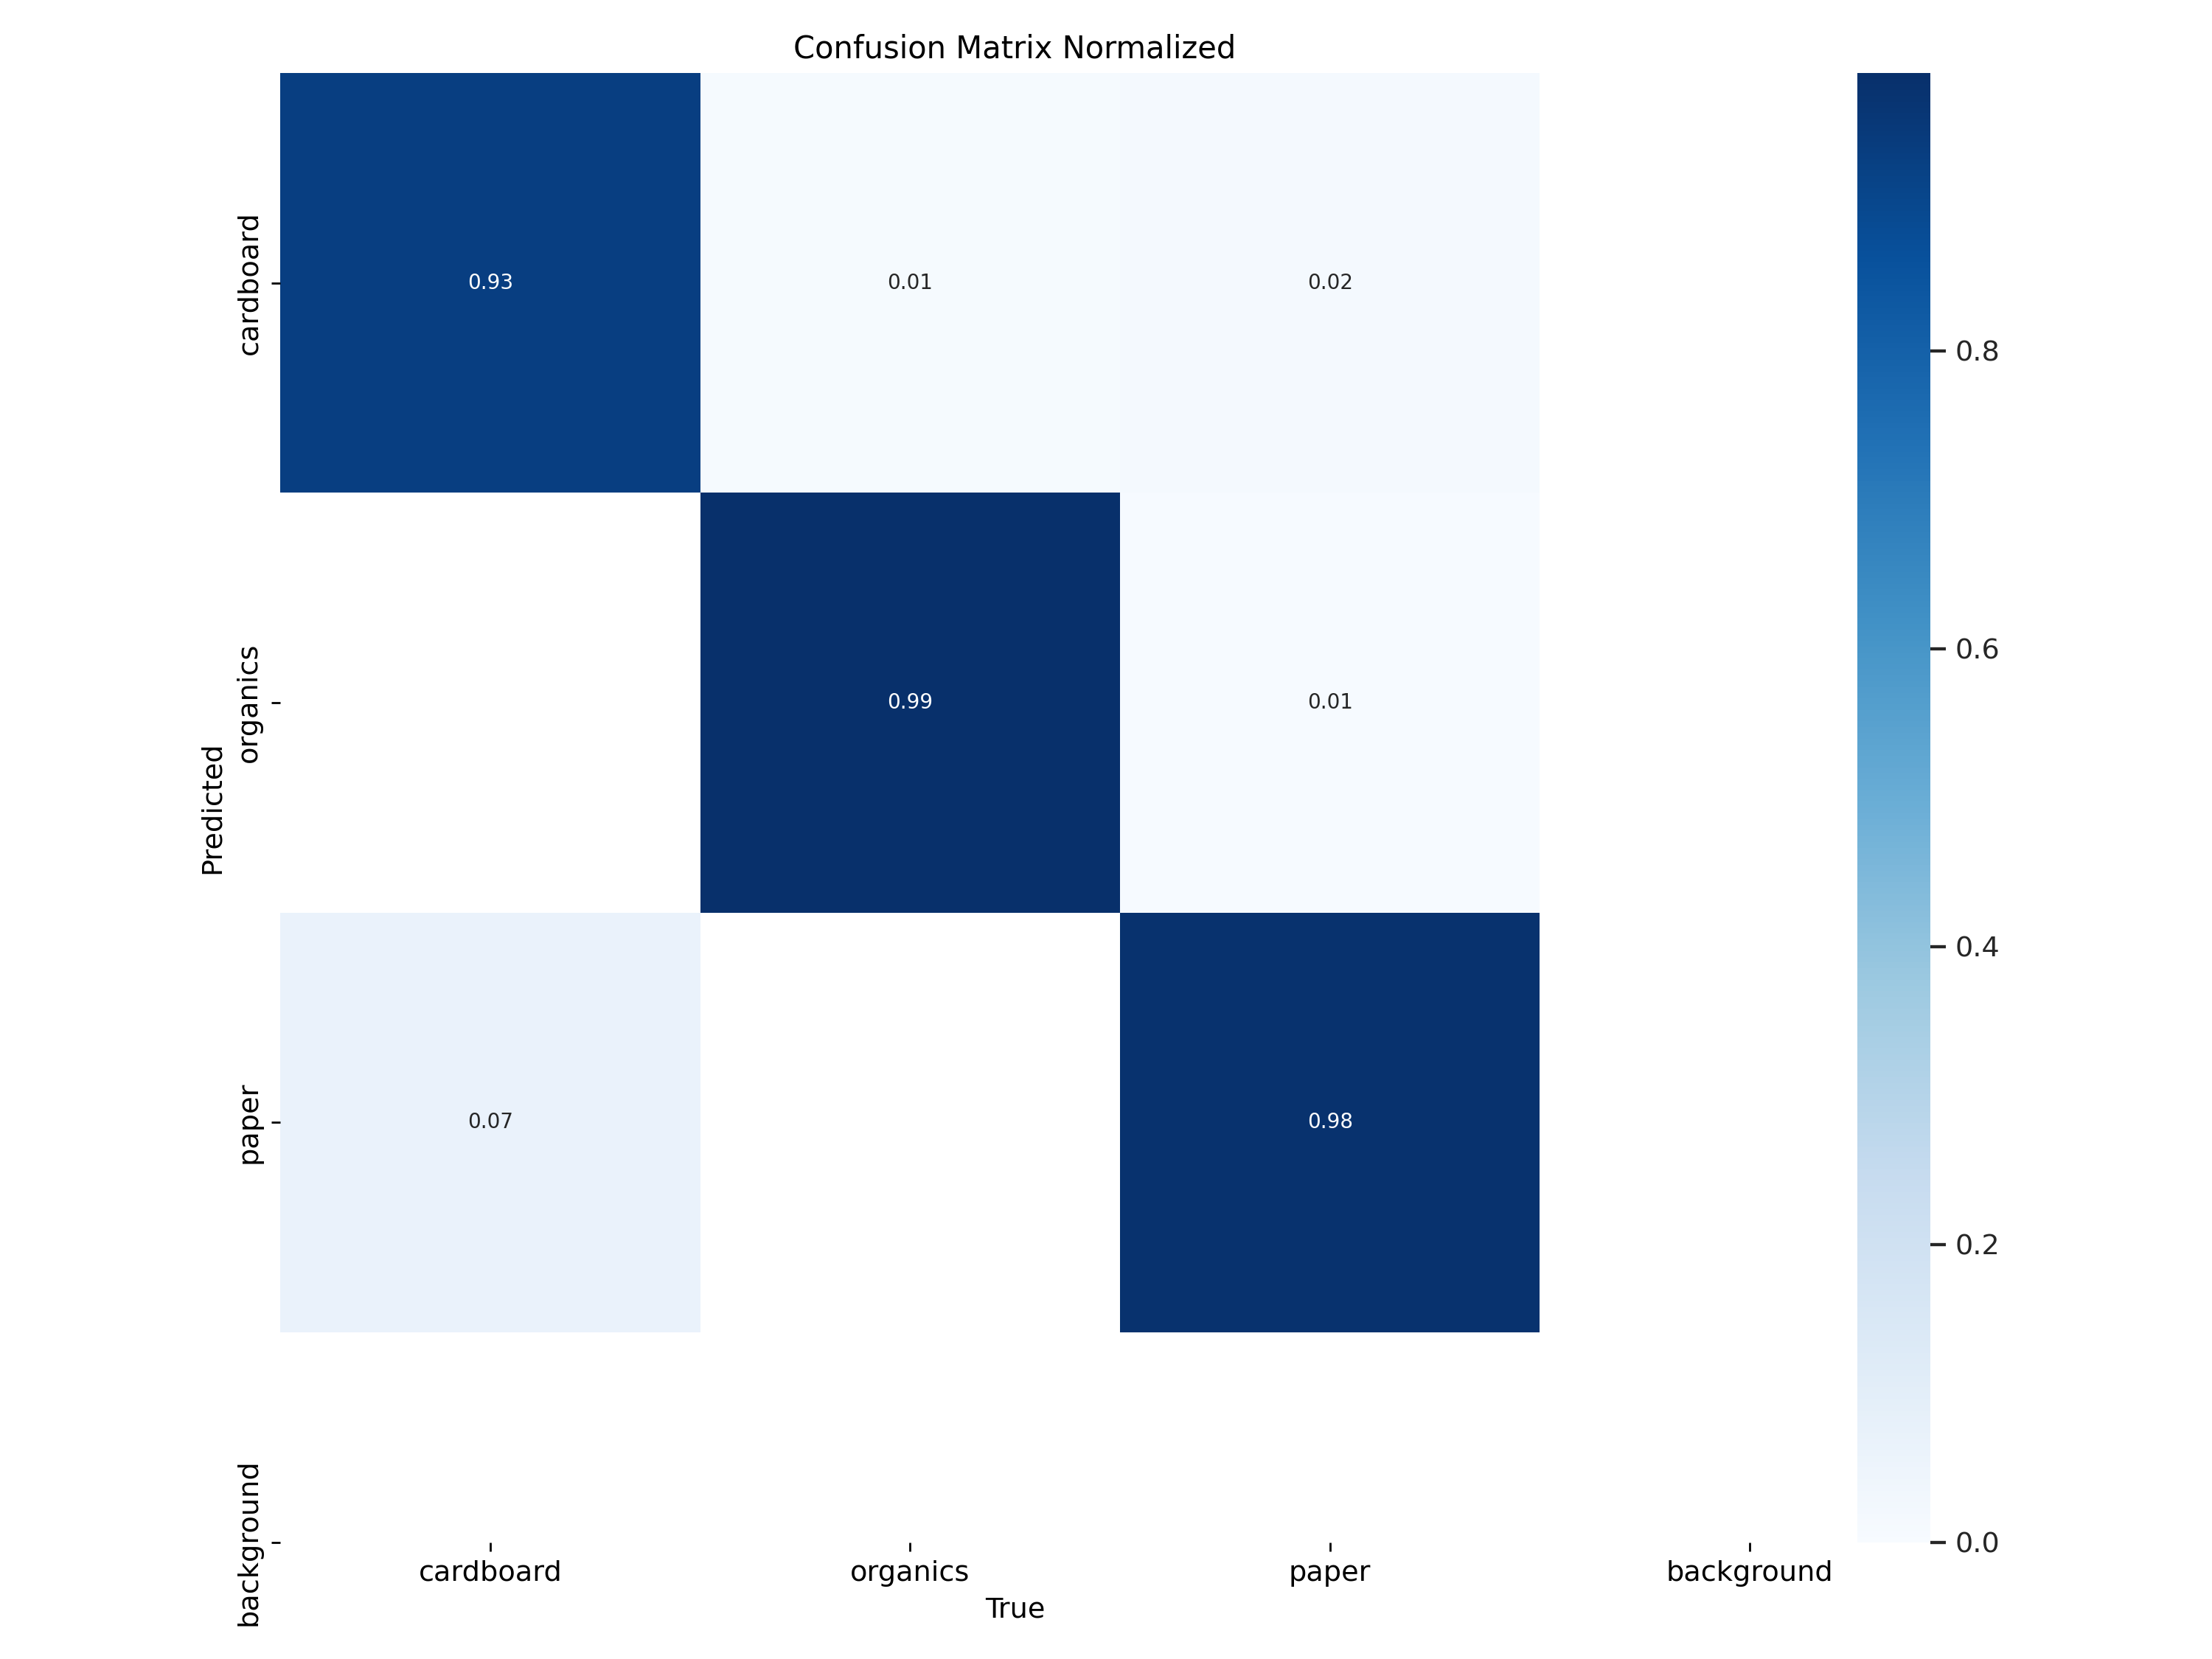

In [12]:
%matplotlib inline
from PIL import Image

Image.open('/content/drive/MyDrive/proj/YOLODataset/runs/classify/train2/confusion_matrix_normalized.png')